# Line detection and removal

I'm gonna create a line mask of the image, then use the mask to delete the lines from the original image

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy.linalg import hadamard

%matplotlib inline

In [158]:
img_name = input("Enter image name: ")
print("Selected", img_name)

Selected 1yfm


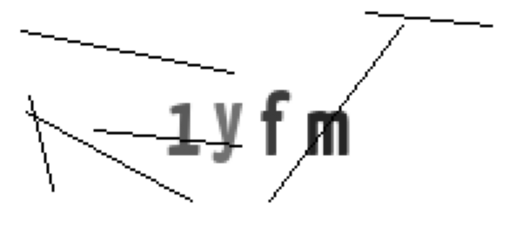

(<matplotlib.image.AxesImage at 0x20ffd49d910>,
 (np.float64(-0.5), np.float64(189.5), np.float64(79.5), np.float64(-0.5)),
 None)

In [ ]:
img = cv2.imread(f"original_images/{img_name}.png", 0)
plt.imshow(img, cmap="gray"), plt.axis("off"), plt.show()

Since all the lines are perfectly black, I can just use thresholding to create the mask.

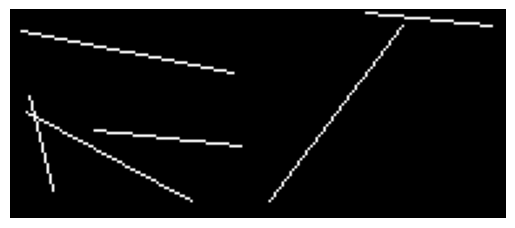

(<matplotlib.image.AxesImage at 0x20ffe6b0d90>,
 (np.float64(-0.5), np.float64(189.5), np.float64(79.5), np.float64(-0.5)),
 None)

In [160]:
_, line_mask = cv2.threshold(img, 1, 255, cv2.THRESH_BINARY_INV)
plt.imshow(line_mask, cmap="gray"), plt.axis("off"), plt.show()

Voila! The lines are gone!

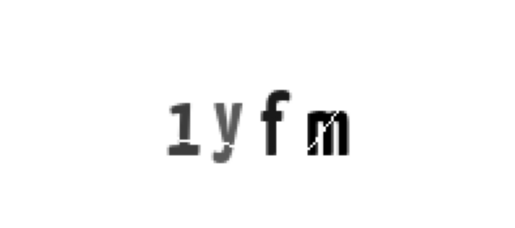

(<matplotlib.image.AxesImage at 0x20ffe5c7c50>,
 (np.float64(-0.5), np.float64(189.5), np.float64(79.5), np.float64(-0.5)),
 None)

In [161]:
result = img.copy()
result[line_mask == 255] = 255
plt.imshow(result, cmap="gray"), plt.axis("off"), plt.show()

Before binarization, I'll sharpen the image a bit

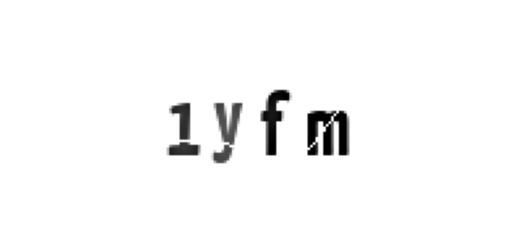

(<matplotlib.image.AxesImage at 0x20ffe592d90>,
 (np.float64(-0.5), np.float64(189.5), np.float64(79.5), np.float64(-0.5)),
 None)

In [162]:
blurred = cv2.GaussianBlur(result, (0, 0), 3)
sharpened = cv2.addWeighted(result, 1.5, blurred, -0.5, 0)
plt.imshow(sharpened, cmap="gray"), plt.axis("off"), plt.show()

Finally, we can binarize the image.

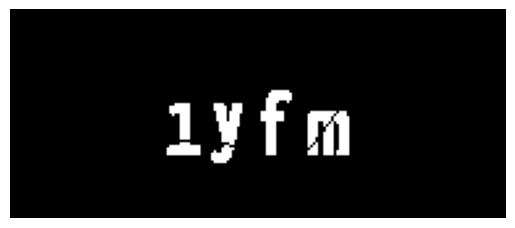

(<matplotlib.image.AxesImage at 0x20ffe8b6c50>,
 (np.float64(-0.5), np.float64(189.5), np.float64(79.5), np.float64(-0.5)),
 None)

In [169]:
_, result_binary = cv2.threshold(sharpened, 250, 255, cv2.THRESH_BINARY_INV)
plt.imshow(result_binary, cmap="gray"), plt.axis("off"), plt.show()